Dataset and DataLoader ready
Batch shapes -> torch.Size([2, 3, 512, 1024]) torch.Size([2, 512, 1024]) torch.Size([2, 512, 1024])


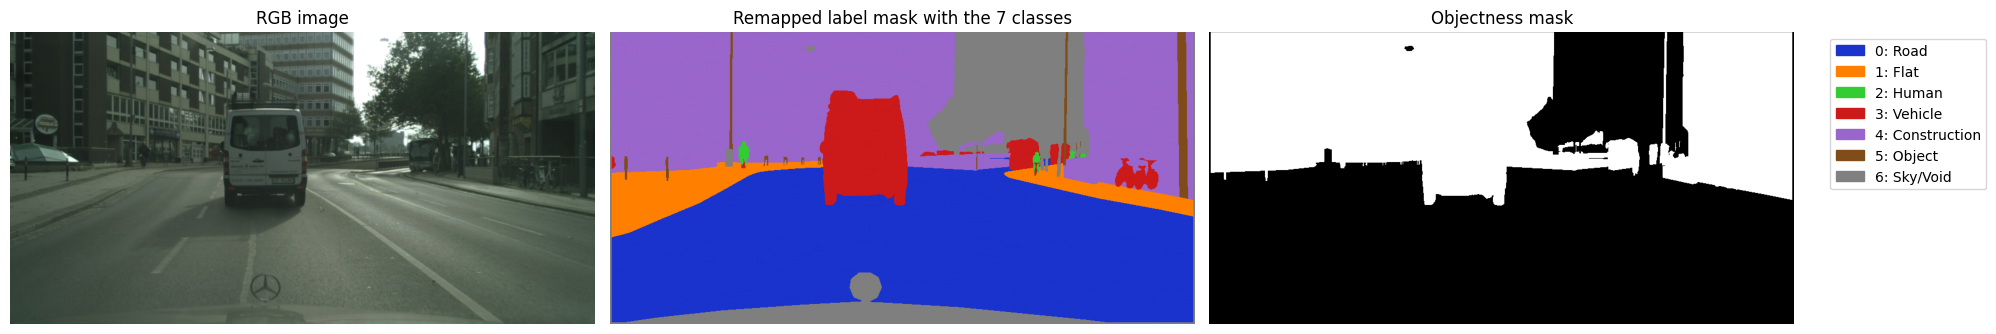

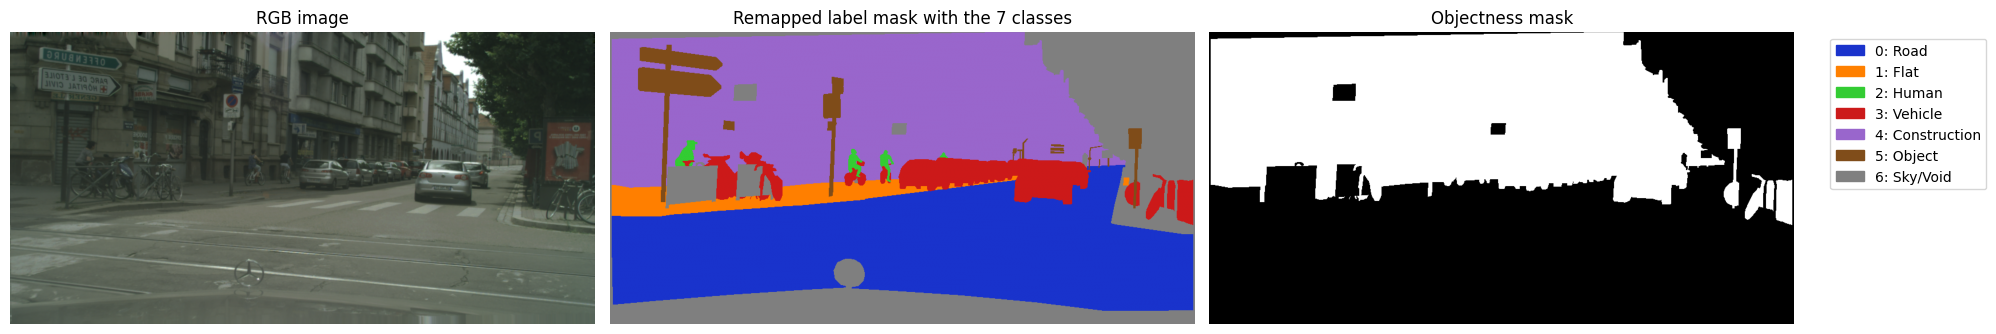

In [ ]:
#=========================================================
# DEBUG TOGGLE SWITCH

def d(*args, **kwargs):
    if d.ON:
        print(*args, **kwargs)

d.ON = False          # <- module-local switch

##example usage
#d("Initial x shape:", x.shape)
#=========================================================

#=============================================================
# IMPORTS
import os
import torch
from torch.utils.data import DataLoader
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
#===============================================================

#===============================================================
# NAVIGATION TO GET TO THE FOLDER TO IMPORT DATALOADER
import sys
sys.path.append("/content/drive/MyDrive/MAGISTRALE/ANNO 1/Computer Vision/Project/RoadObstacleDetection/ProjectWorkspace/src")
from dataloader.cityscapes_dataloader import CityscapesDataset
#=================================================================


#=================================================================
#SETTING UP THE PATHS
images_dir = "/content/drive/MyDrive/MAGISTRALE/ANNO 1/Computer Vision/Project/RoadObstacleDetection/Datasets/leftImg8bit_trainvaltest/leftImg8bit_trainvaltest/leftImg8bit/train"
masks_dir = "/content/drive/MyDrive/MAGISTRALE/ANNO 1/Computer Vision/Project/RoadObstacleDetection/Datasets/leftImg8bit_trainvaltest/gtFine_trainvaltest/gtFine/train"
split_file = "/content/drive/MyDrive/MAGISTRALE/ANNO 1/Computer Vision/Project/RoadObstacleDetection/ProjectWorkspace/splits/train_list.txt"
#=========================================================================================================================================================================================

with open(split_file, "r") as f:
  file_list = [line.strip() for line in f]


#============================================================================================
# DATASET INSTANTIATION
dataset = CityscapesDataset(images_dir, masks_dir, file_list, augment=True) # Here i DO need to see if augmentation techniques work properly
dataloader = DataLoader(dataset, batch_size = 2, shuffle=True)
print("Dataset and DataLoader ready") #we always wanna print something, so not getting it toggled using traditional print function
#============================================================================================


#======================================================================================================
# VISUALIZATION
def denormalize(tensor, mean, std):
  for t, m, s in zip(tensor, mean, std):
    t.mul_(s).add_(m)
  return tensor

def visualize_batch(images, labels, objects):
  class_colors = [
      (0.1, 0.2, 0.8),  # 0: Road (blue)
      (1.0, 0.5, 0.0),  # 1: Flat (orange)
      (0.2, 0.8, 0.2),  # 2: Human (green)
      (0.8, 0.1, 0.1),  # 3: Vehicle (red)
      (0.6, 0.4, 0.8),  # 4: Construction (purple)
      (0.5, 0.3, 0.1),  # 5: Object (brown)
      (0.5, 0.5, 0.5),  # 6: Sky/Void (gray)
  ]
  cmap = ListedColormap(class_colors)

  batch_size = images.shape[0]
  for i in range(batch_size):
    fig, axs = plt.subplots(1,3, figsize=(20, 6))

    rgb = denormalize(images[i].clone(), dataset.mean, dataset.std)
    axs[0].imshow(TF.to_pil_image(rgb))
    axs[0].set_title("RGB image")

    axs[1].imshow(labels[i].numpy(), cmap=cmap, vmin=0, vmax=6)
    axs[1].set_title("Remapped label mask with the 7 classes")

    axs[2].imshow(objects[i].numpy(), cmap='gray')
    axs[2].set_title("Objectness mask")

    for ax in axs:
      ax.axis('off')

    class_names = ["Road", "Flat", "Human", "Vehicle", "Construction", "Object", "Sky/Void"]
    patches = [mpatches.Patch(color=class_colors[j], label=f"{j}: {class_names[j]}") for j in range(7)]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
#==================================================================================================================



#====================================================================================================================
# SAMPLE EFFECTIVE VISUALIZATION
for batch in dataloader:
  images, labels, objects = batch
  print("Batch shapes ->", images.shape, labels.shape, objects.shape)
  visualize_batch(images, labels, objects)
  break #just one needed
#========================================================================================================================


